In [58]:
%load_ext autoreload
%autoreload 2
import ziff.ziff 

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S')

logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("test")

02:12:58 INFO:test


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
pwd

'/Users/graziani/libs/Ziff/notebooks'

In [60]:
img = '/Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c08_o_q3_sciimg.fits'


In [61]:
z = ziff.ziff.Ziff(img,logger=logger,build_default_cat = True, load_default_cat = False)

02:13:00 INFO:Loading KWallet
02:13:00 INFO:Loading SecretService
02:13:00 INFO:Loading Windows
02:13:00 INFO:Loading chainer
02:13:00 INFO:Loading macOS


Building default catalogs


In [10]:
#z.config

In [22]:
z.set_config_value('i/o,nstars',100)
z.set_config_value('psf,interp,order',2)

In [23]:
z.run_piff('gaia_calibration',overwrite_cat=True)

11:39:47 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c08_o_q3_sciimg.fits
11:39:47 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c08_o_q3_sciimg.fits
11:39:47 WARNING:Iteration 1: Fitting 100 stars
11:39:48 INFO:Beginning solution of matrix size (1350, 1350)
11:39:48 INFO:Ill-conditioned matrix (rcond=5.47423e-23): result may not be accurate.
11:39:48 WARNING:             Total chisq = 12414.25 / 22324 dof
11:39:48 WARNING:Iteration 2: Fitting 100 stars
11:39:49 INFO:Beginning solution of matrix size (1350, 1350)
11:39:49 INFO:Ill-conditioned matrix (rcond=5.44178e-23): result may not be accurate.
11:39:50 INFO:Found 4 stars with chisq > thresh
11:39:50 INFO:             Removed 4 outliers
11:39:50 WARNING:             Total chisq = 5041.75 / 21438 dof
11:39:50 WARNING:Iteration 3: Fitting 96 stars
11:39:51 INFO:Beginning solution of matrix size 

In [63]:
z.set_config_value('i/o,nstars',10000)
stars = z.make_stars('gaia_full',overwrite_cat=True)
new_stars = z.reflux_stars(stars,fit_center=False, use_minuit=False)
res = z.compute_residuals(new_stars,normed=True,sky=200)
shapes = z.compute_shapes(new_stars)


02:13:17 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c08_o_q3_sciimg.fits
02:13:17 WARNING:Reading image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c08_o_q3_sciimg.fits
02:13:17 WARNING:Reading star catalog /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c08_o_q3_gaia_full.fits.
02:13:17 INFO:Processing catalog 0 with 506 stars
02:13:18 WARNING:Read a total of 506 stars from 1 image
02:13:18 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c08_o_q3_sciimg.fits


Processing 1/506
Processing 2/506
Processing 3/506
Processing 4/506
Processing 5/506
Processing 6/506
Processing 7/506
Processing 8/506
Processing 9/506
Processing 10/506
Processing 11/506
Processing 12/506
Processing 13/506
Processing 14/506
Processing 15/506
Processing 16/506
Processing 17/506
Processing 18/506
Processing 19/506
Processing 20/506
Processing 21/506
Processing 22/506
Processing 23/506
Processing 24/506
Processing 25/506
Processing 26/506
Processing 27/506
Processing 28/506
Processing 29/506
Processing 30/506
Processing 31/506
Processing 32/506
Processing 33/506
Processing 34/506
Processing 35/506
Processing 36/506
Processing 37/506
Processing 38/506
Processing 39/506
Processing 40/506
Processing 41/506
Processing 42/506
Processing 43/506
Processing 44/506
Processing 45/506
Processing 46/506
Processing 47/506
Processing 48/506
Processing 49/506
Processing 50/506
Processing 51/506
Processing 52/506
Processing 53/506
Processing 54/506
Processing 55/506
Processing 56/506
P

Processing 480/506
Processing 481/506
Processing 482/506
Processing 483/506
Processing 484/506
Processing 485/506
Processing 486/506
Processing 487/506
Processing 488/506
Processing 489/506
Processing 490/506
Processing 491/506
Processing 492/506
Processing 493/506
Processing 494/506
Processing 495/506
Processing 496/506
Processing 497/506
Processing 498/506
Processing 499/506
Processing 500/506
Processing 501/506
Processing 502/506
Processing 503/506
Processing 504/506
Processing 505/506
Processing 506/506


In [68]:
N.savez('test',**shapes)

In [71]:
print(N.load('test.npz')['T_data'])

[ 1.24689474  1.28897674  1.33036922  1.15706957  1.27659047  1.23634347
  1.29384166  1.2623528   1.29854489  1.26509485  1.48650652  1.26060563
  1.2546114   1.25916529  1.26858063  1.24489173  1.34950832  1.34775241
  1.26590312  1.34718136  1.29814057  1.4187598   1.29940599  1.26479864
  1.40830134  1.29281637  1.28189434  1.37495187  1.29647367  1.36383777
  1.36410562  1.28060225  1.30552582  1.34998007  1.28136827  1.26454363
  1.32848814  1.28561584  1.32554889  1.26284819  1.31255873  1.47334248
  1.30119099  1.29643341  1.24746761  1.26246308  1.30248621  1.35915487
  1.31469694  1.28296201  1.38553476  1.30207118  1.36816999  1.30223016
  1.3102232   1.34768858  1.3072745   1.27212055  1.31784218  1.28671955
  1.36973769  1.32589669  1.3238842   1.46934772  1.2709907   1.30728382
  1.22037106  0.95600982  1.31696824  1.2783362   1.31552181  1.23177517
  1.25217925  1.46023701  1.32798251  1.28907085  1.26982364  1.26070835
  1.30578977  1.39645134  1.23312916  1.30208896  1

<IPython.core.display.Javascript object>


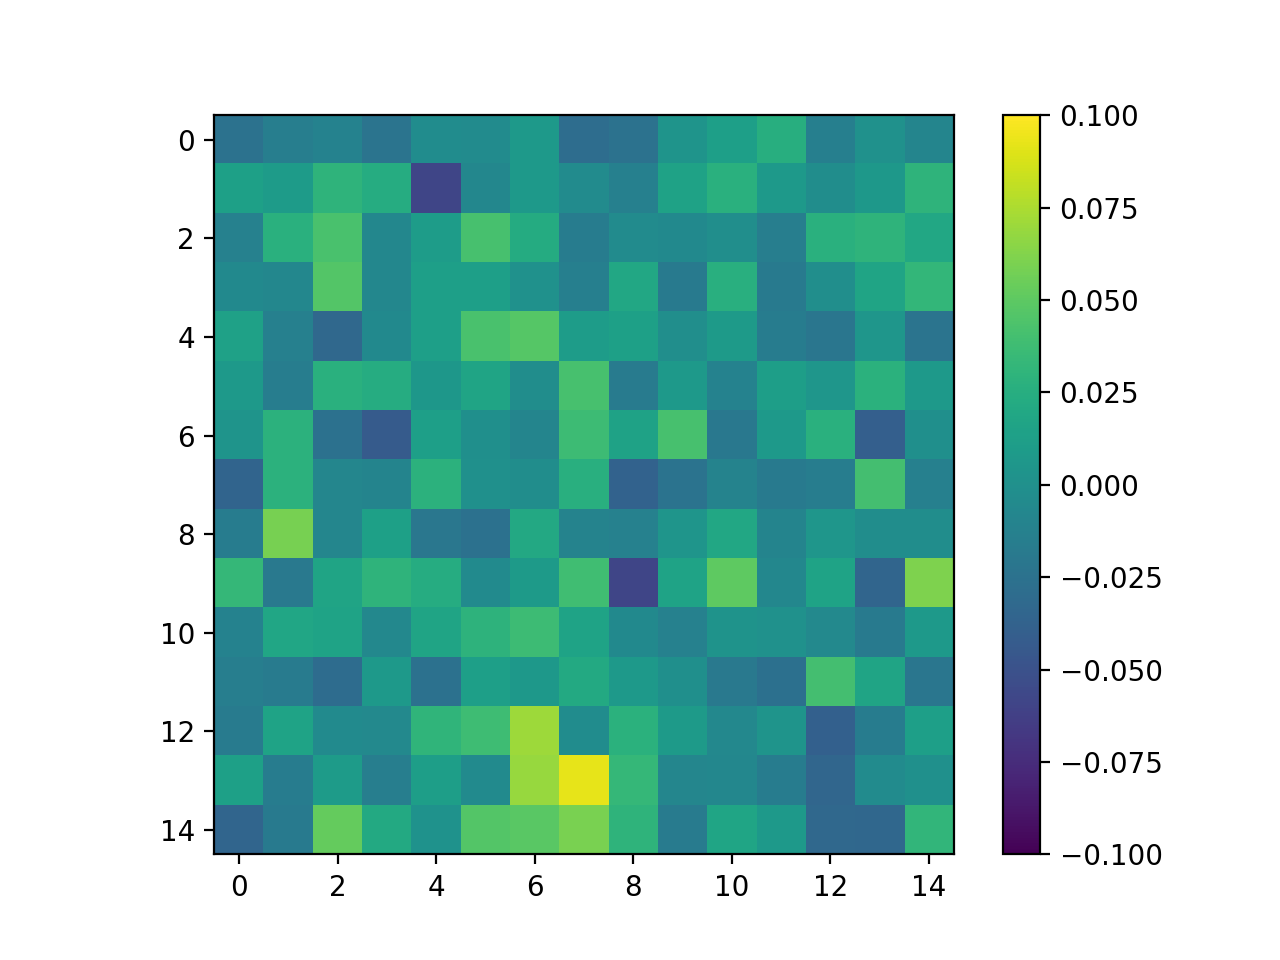

<IPython.core.display.Javascript object>


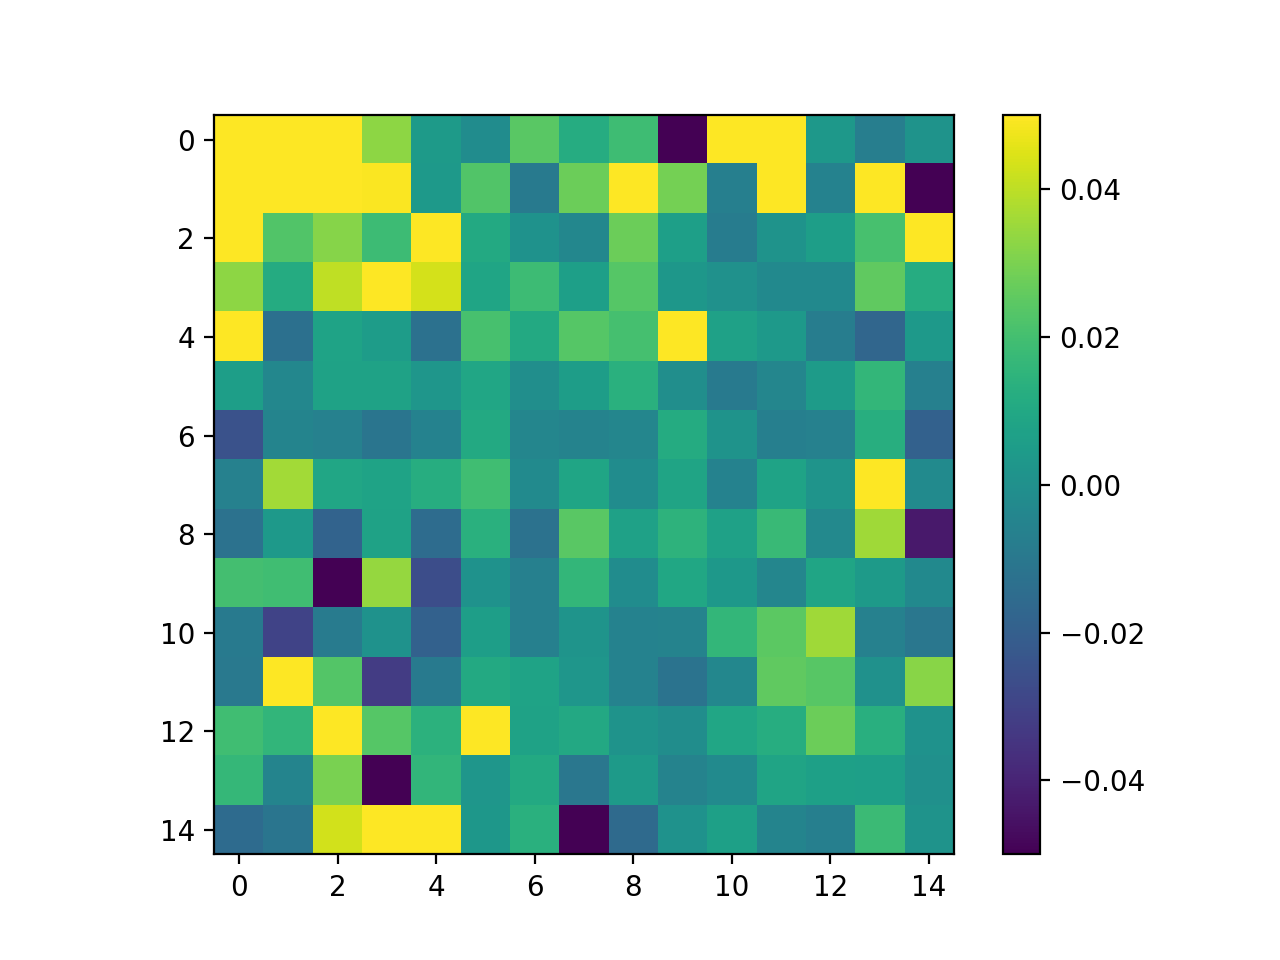

<IPython.core.display.Javascript object>


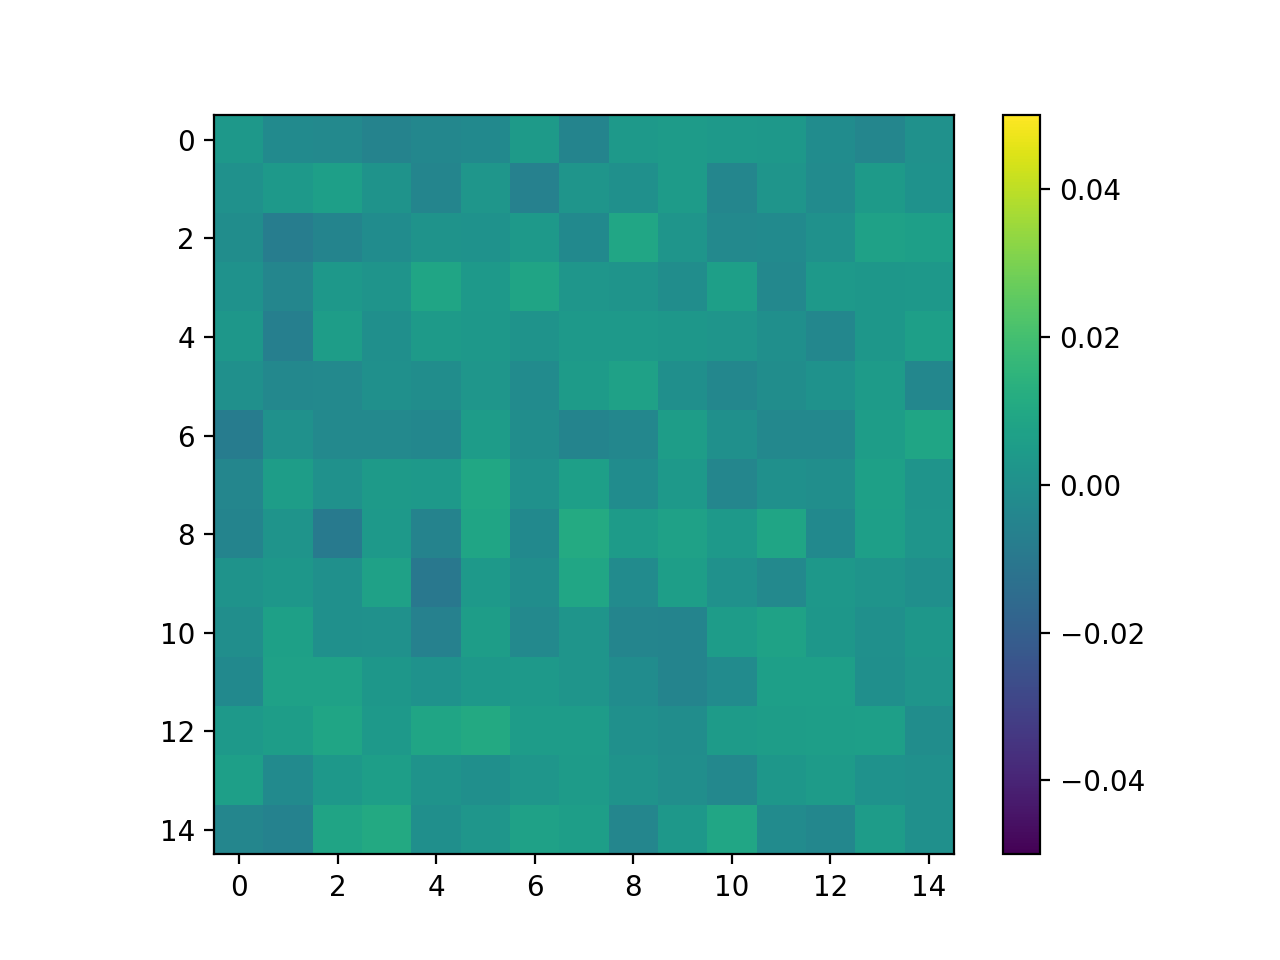

In [29]:
%matplotlib notebook
fig, ax = P.subplots()
i = ax.imshow(res[10],vmin=-0.1,vmax=0.1)
P.colorbar(i)


fig, ax = P.subplots()
i = ax.imshow(N.mean(res,axis=0),vmin=-0.05,vmax=0.05)
P.colorbar(i)


fig, ax = P.subplots()
i = ax.imshow(N.median(res,axis=0),vmin=-0.05,vmax=0.05)
P.colorbar(i)


<IPython.core.display.Javascript object>


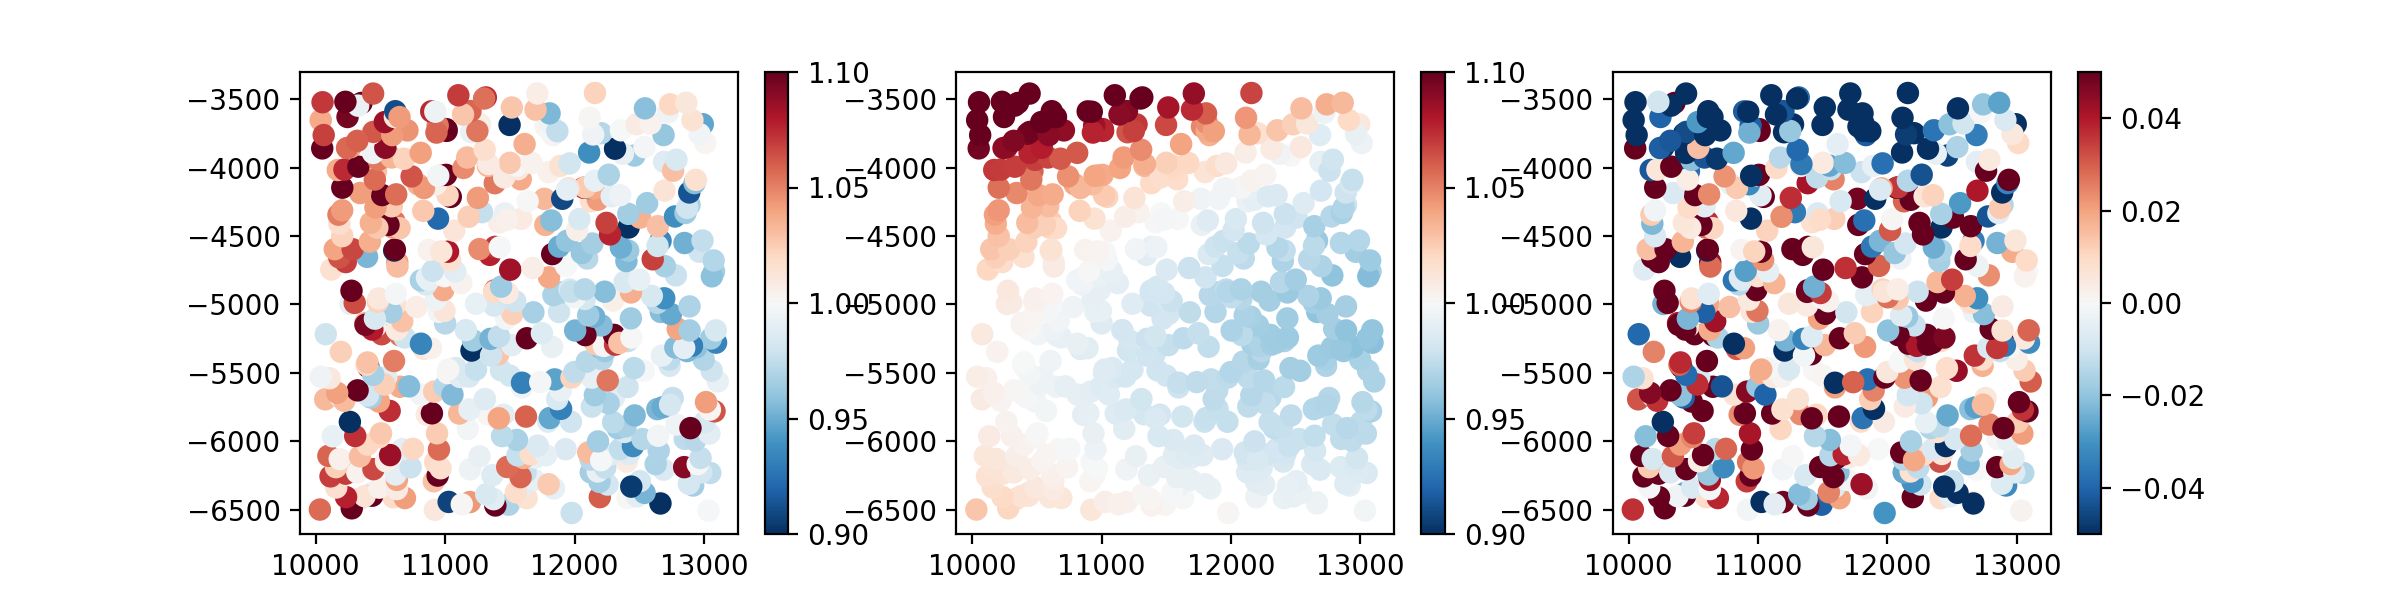

In [30]:
np = N
fig, axes = P.subplots(1,3,figsize=(12,3))
cmap = 'RdBu_r'
s = axes[0].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data_normalized']),s=50,vmin=0.9,vmax=1.1,cmap=cmap)
fig.colorbar(s,ax=axes[0])
s = axes[1].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_model_normalized']),s=50,vmin=0.9,vmax=1.1,cmap=cmap)
fig.colorbar(s,ax=axes[1])

s = axes[2].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data'])-np.asarray(shapes['T_model']),s=50,vmin=-0.05,vmax=0.05,cmap=cmap)
fig.colorbar(s,ax=axes[2])


# PER CCD

In [31]:
imgs = ['/Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q{}_sciimg.fits'.format(i+1) for i in range(4)]
z = ziff.ziff.Ziff(imgs,logger=logger,load_default_cat= True, build_default_cat = True)
z.set_config_value('i/o,nstars',100)
z.set_config_value('psf,interp,order',2)
z.run_piff('gaia_calibration',overwrite_cat=True)

Loading default catalogs


11:46:02 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
11:46:02 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
11:46:02 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q3_sciimg.fits
11:46:02 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q4_sciimg.fits
11:46:04 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
11:46:04 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
11:46:04 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg

In [32]:
z.set_config_value('i/o,nstars',10000)
stars = z.make_stars('gaia_full',overwrite_cat=True)
new_stars = z.reflux_stars(stars,fit_center=True, use_minuit=True)
res = z.compute_residuals(new_stars,normed=True,sky=200)
shapes = z.compute_shapes(new_stars)


11:47:00 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
11:47:00 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
11:47:00 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q3_sciimg.fits
11:47:01 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q4_sciimg.fits
11:47:01 WARNING:Reading image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
11:47:01 WARNING:Reading star catalog /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_gaia_full.fits.
11:47:01 INFO:Processing catalog 0 with 468 stars
11:47:01 WARNING:Reading image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_2019030148

Processing 1/2047
Processing 2/2047
Processing 3/2047
Processing 4/2047
Processing 5/2047
Processing 6/2047
Processing 7/2047
Processing 8/2047
Processing 9/2047
Processing 10/2047
Processing 11/2047
Processing 12/2047
Processing 13/2047
Processing 14/2047
Processing 15/2047
Processing 16/2047
Processing 17/2047
Processing 18/2047
Processing 19/2047
Processing 20/2047
Processing 21/2047
Processing 22/2047
Processing 23/2047
Processing 24/2047
Processing 25/2047
Processing 26/2047
Processing 27/2047
Processing 28/2047
Processing 29/2047
Processing 30/2047
Processing 31/2047
Processing 32/2047
Processing 33/2047
Processing 34/2047
Processing 35/2047
Processing 36/2047
Processing 37/2047
Processing 38/2047
Processing 39/2047
Processing 40/2047
Processing 41/2047
Processing 42/2047
Processing 43/2047
Processing 44/2047
Processing 45/2047
Processing 46/2047
Processing 47/2047
Processing 48/2047
Processing 49/2047
Processing 50/2047
Processing 51/2047
Processing 52/2047
Processing 53/2047
Pr

Processing 417/2047
Processing 418/2047
Processing 419/2047
Processing 420/2047
Processing 421/2047
Processing 422/2047
Processing 423/2047
Processing 424/2047
Processing 425/2047
Processing 426/2047
Processing 427/2047
Processing 428/2047
Processing 429/2047
Processing 430/2047
Processing 431/2047
Processing 432/2047
Processing 433/2047
Processing 434/2047
Processing 435/2047
Processing 436/2047
Processing 437/2047
Processing 438/2047
Processing 439/2047
Processing 440/2047
Processing 441/2047
Processing 442/2047
Processing 443/2047
Processing 444/2047
Processing 445/2047
Processing 446/2047
Processing 447/2047
Processing 448/2047
Processing 449/2047
Processing 450/2047
Processing 451/2047
Processing 452/2047
Processing 453/2047
Processing 454/2047
Processing 455/2047
Processing 456/2047
Processing 457/2047
Processing 458/2047
Processing 459/2047
Processing 460/2047
Processing 461/2047
Processing 462/2047
Processing 463/2047
Processing 464/2047
Processing 465/2047
Processing 466/2047


Processing 829/2047
Processing 830/2047
Processing 831/2047
Processing 832/2047
Processing 833/2047
Processing 834/2047
Processing 835/2047
Processing 836/2047
Processing 837/2047
Processing 838/2047
Processing 839/2047
Processing 840/2047
Processing 841/2047
Processing 842/2047
Processing 843/2047
Processing 844/2047
Processing 845/2047
Processing 846/2047
Processing 847/2047
Processing 848/2047
Processing 849/2047
Processing 850/2047
Processing 851/2047
Processing 852/2047
Processing 853/2047
Processing 854/2047
Processing 855/2047
Processing 856/2047
Processing 857/2047
Processing 858/2047
Processing 859/2047
Processing 860/2047
Processing 861/2047
Processing 862/2047
Processing 863/2047
Processing 864/2047
Processing 865/2047
Processing 866/2047
Processing 867/2047
Processing 868/2047
Processing 869/2047
Processing 870/2047
Processing 871/2047
Processing 872/2047
Processing 873/2047
Processing 874/2047
Processing 875/2047
Processing 876/2047
Processing 877/2047
Processing 878/2047


Processing 1228/2047
Processing 1229/2047
Processing 1230/2047
Processing 1231/2047
Processing 1232/2047
Processing 1233/2047
Processing 1234/2047
Processing 1235/2047
Processing 1236/2047
Processing 1237/2047
Processing 1238/2047
Processing 1239/2047
Processing 1240/2047
Processing 1241/2047
Processing 1242/2047
Processing 1243/2047
Processing 1244/2047
Processing 1245/2047
Processing 1246/2047
Processing 1247/2047
Processing 1248/2047
Processing 1249/2047
Processing 1250/2047
Processing 1251/2047
Processing 1252/2047
Processing 1253/2047
Processing 1254/2047
Processing 1255/2047
Processing 1256/2047
Processing 1257/2047
Processing 1258/2047
Processing 1259/2047
Processing 1260/2047
Processing 1261/2047
Processing 1262/2047
Processing 1263/2047
Processing 1264/2047
Processing 1265/2047
Processing 1266/2047
Processing 1267/2047
Processing 1268/2047
Processing 1269/2047
Processing 1270/2047
Processing 1271/2047
Processing 1272/2047
Processing 1273/2047
Processing 1274/2047
Processing 12

Processing 1621/2047
Processing 1622/2047
Processing 1623/2047
Processing 1624/2047
Processing 1625/2047
Processing 1626/2047
Processing 1627/2047
Processing 1628/2047
Processing 1629/2047
Processing 1630/2047
Processing 1631/2047
Processing 1632/2047
Processing 1633/2047
Processing 1634/2047
Processing 1635/2047
Processing 1636/2047
Processing 1637/2047
Processing 1638/2047
Processing 1639/2047
Processing 1640/2047
Processing 1641/2047
Processing 1642/2047
Processing 1643/2047
Processing 1644/2047
Processing 1645/2047
Processing 1646/2047
Processing 1647/2047
Processing 1648/2047
Processing 1649/2047
Processing 1650/2047
Processing 1651/2047
Processing 1652/2047
Processing 1653/2047
Processing 1654/2047
Processing 1655/2047
Processing 1656/2047
Processing 1657/2047
Processing 1658/2047
Processing 1659/2047
Processing 1660/2047
Processing 1661/2047
Processing 1662/2047
Processing 1663/2047
Processing 1664/2047
Processing 1665/2047
Processing 1666/2047
Processing 1667/2047
Processing 16

Processing 2014/2047
Processing 2015/2047
Processing 2016/2047
Processing 2017/2047
Processing 2018/2047
Processing 2019/2047
Processing 2020/2047
Processing 2021/2047
Processing 2022/2047
Processing 2023/2047
Processing 2024/2047
Processing 2025/2047
Processing 2026/2047
Processing 2027/2047
Processing 2028/2047
Processing 2029/2047
Processing 2030/2047
Processing 2031/2047
Processing 2032/2047
Processing 2033/2047
Processing 2034/2047
Processing 2035/2047
Processing 2036/2047
Processing 2037/2047
Processing 2038/2047
Processing 2039/2047
Processing 2040/2047
Processing 2041/2047
Processing 2042/2047
Processing 2043/2047
Processing 2044/2047
Processing 2045/2047
Processing 2046/2047
Processing 2047/2047


<IPython.core.display.Javascript object>


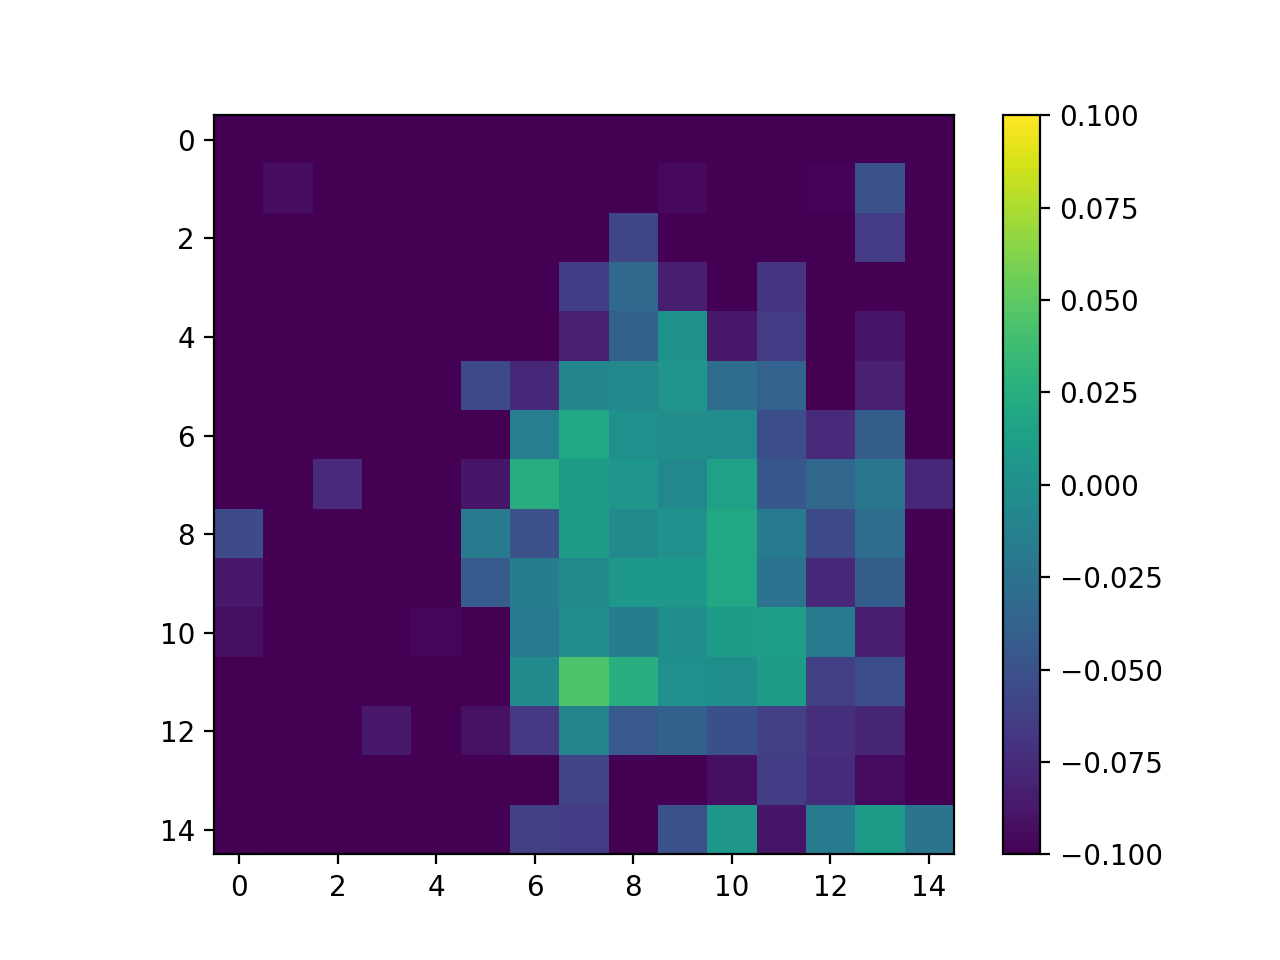

<IPython.core.display.Javascript object>


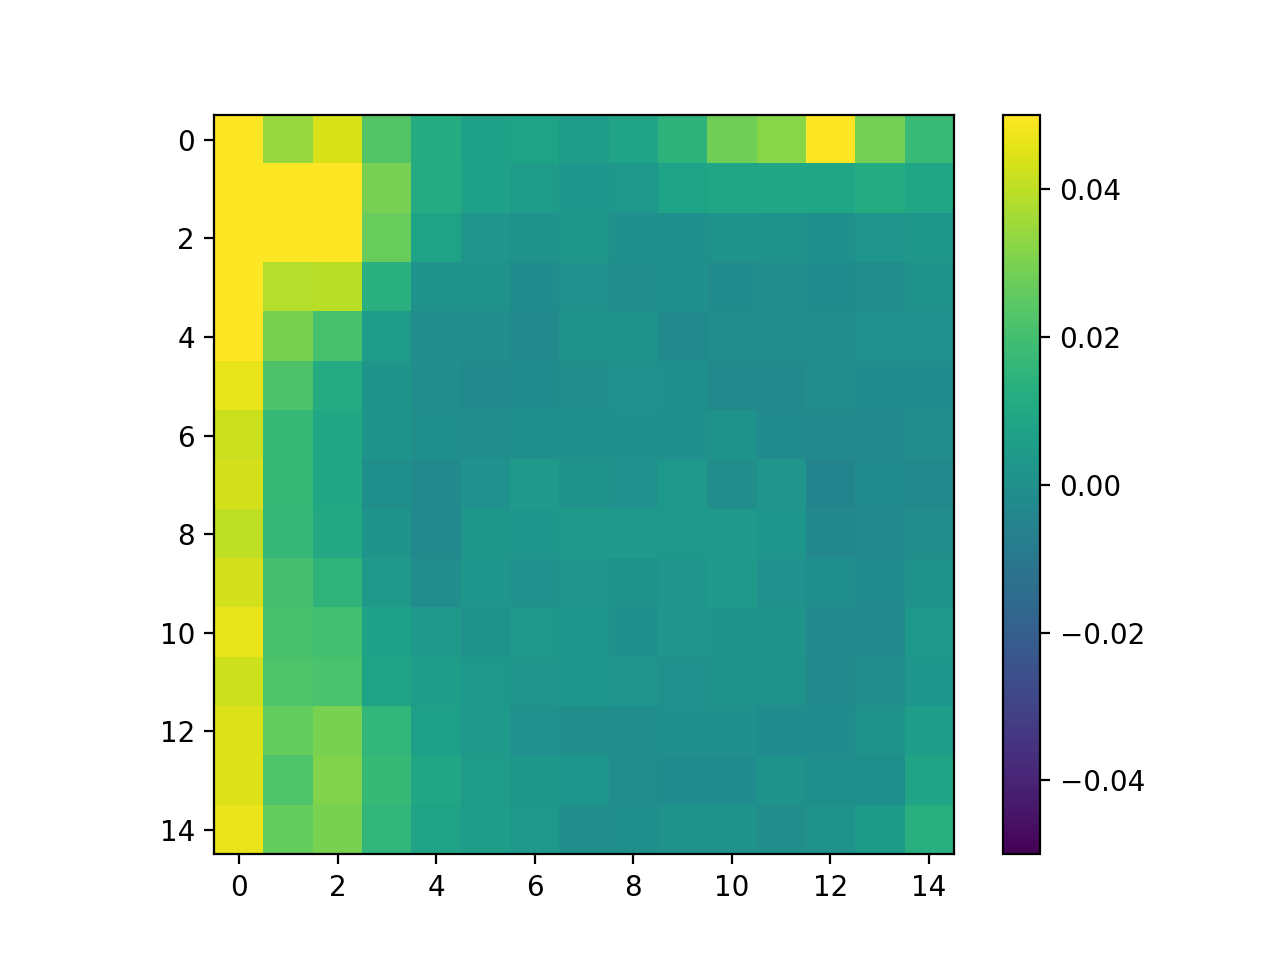

<IPython.core.display.Javascript object>


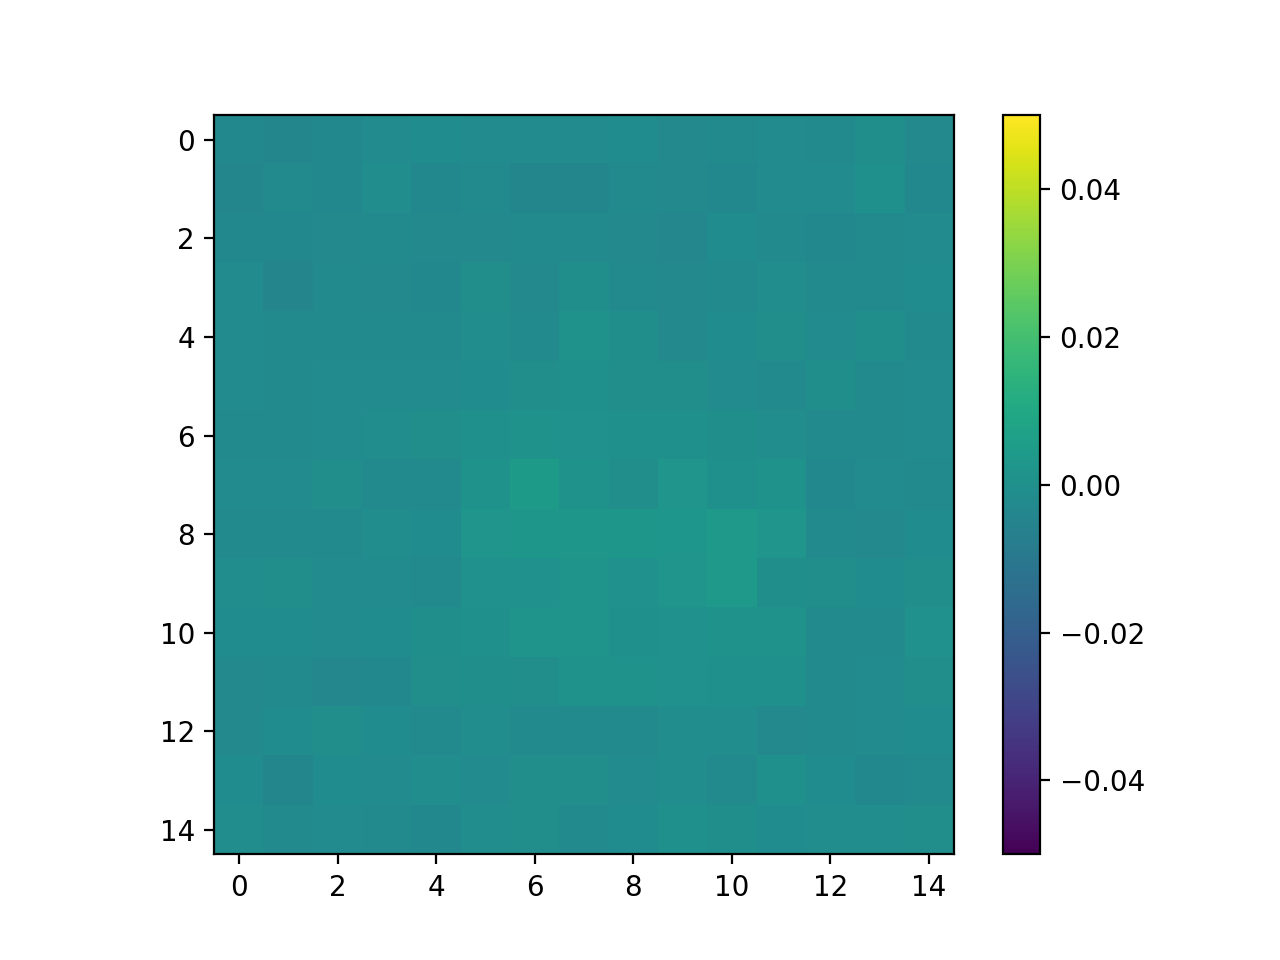

In [33]:
%matplotlib notebook
fig, ax = P.subplots()
i = ax.imshow(res[10],vmin=-0.1,vmax=0.1)
P.colorbar(i)

fig, ax = P.subplots()
i = ax.imshow(N.mean(res,axis=0),vmin=-0.05,vmax=0.05)
P.colorbar(i)

fig, ax = P.subplots()
i = ax.imshow(N.median(res,axis=0),vmin=-0.05,vmax=0.05)
P.colorbar(i)

<IPython.core.display.Javascript object>


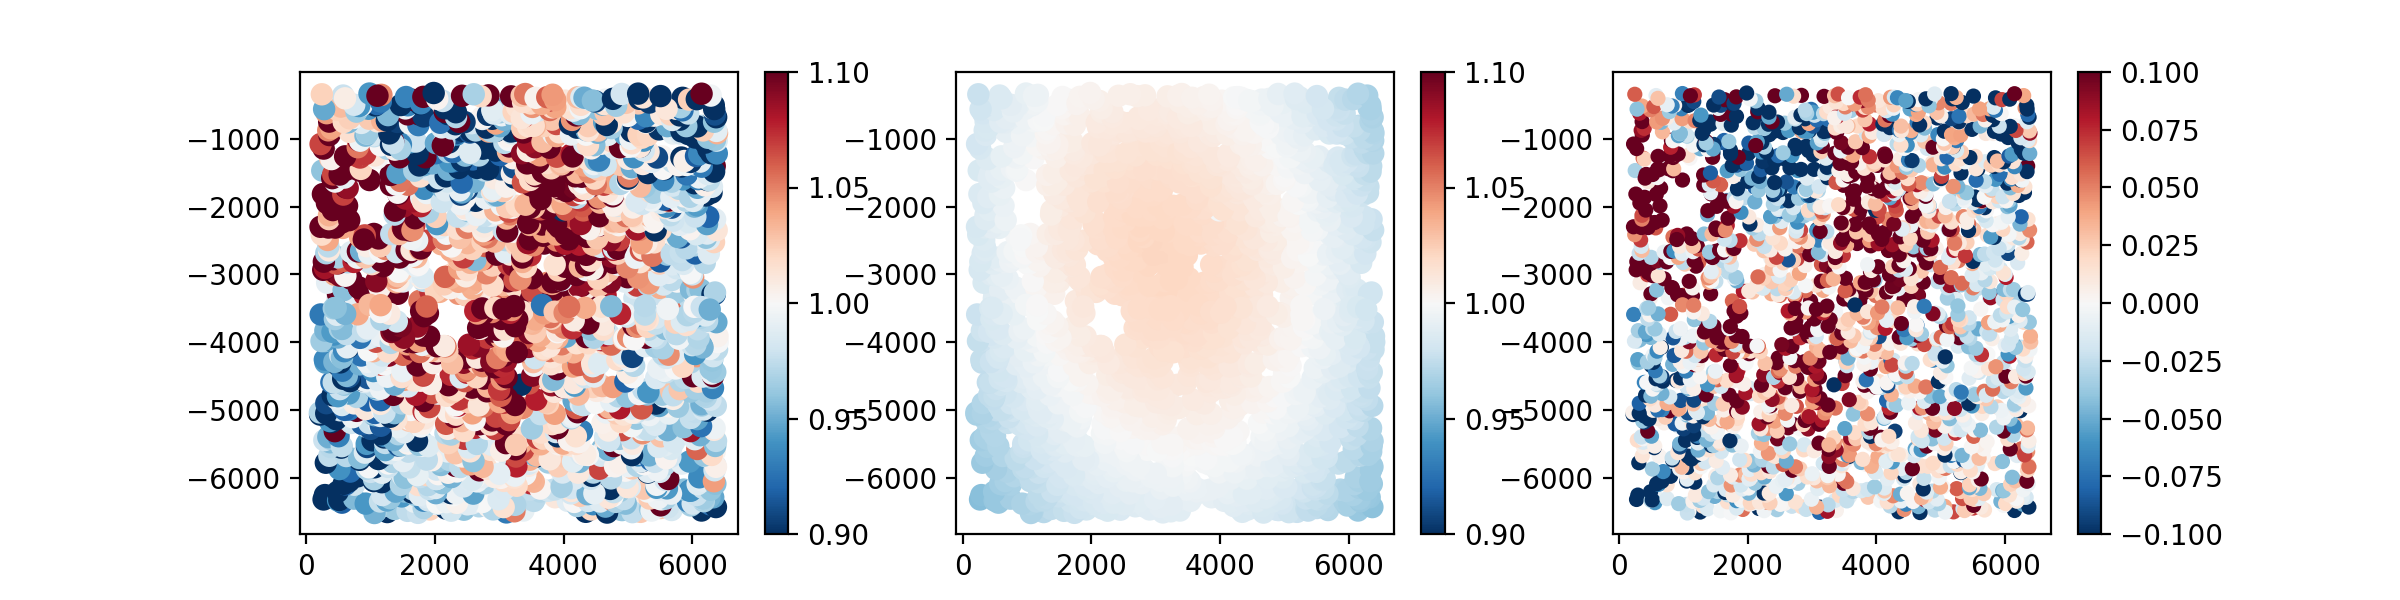

In [36]:
np = N
fig, axes = P.subplots(1,3,figsize=(12,3))
cmap = 'RdBu_r'
s = axes[0].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data_normalized']),s=50,vmin=0.9,vmax=1.1,cmap=cmap)
fig.colorbar(s,ax=axes[0])
s = axes[1].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_model_normalized']),s=50,vmin=0.9,vmax=1.1,cmap=cmap)
fig.colorbar(s,ax=axes[1])

s = axes[2].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data'])-np.asarray(shapes['T_model']),s=20,vmin=-0.1,vmax=0.1,cmap=cmap)
fig.colorbar(s,ax=axes[2])


In [3]:

DOWNLOAD = False
from ztfquery import query
zquery = query.ZTFQuery() 
zquery.load_metadata(sql_query = "ccdid=4 and fid=1 and obsjd BETWEEN 2458543.9 AND 2458544")
#zquery.load_metadata(sql_query = "qid=1 and fid=1 and filefracday=20190301480845")


In [5]:
z = ziff.ziff.ZiffCollection.from_zquery(zquery,['ccdid','filefracday'],build_default_cat = False, load_default_cat = False)


In [30]:
with open('testing.txt','w') as f:
    for ziff in z.ziffs:
        for (i,l0) in enumerate(ziff._sciimg):
            if i ==0 :
                f.write(l0)
            else:
                f.write(',' + l0)
        f.write('\n')

In [42]:
df = pd.read_csv('testing.txt',header=0,index_col=False,names=(0,1,2,3))
df.loc[0].values

array(['/Users/graziani/Data/ZTF/sci/2019/0301/481516/ztf_20190301481516_000530_zg_c04_o_q4_sciimg.fits',
       '/Users/graziani/Data/ZTF/sci/2019/0301/481516/ztf_20190301481516_000530_zg_c04_o_q2_sciimg.fits',
       '/Users/graziani/Data/ZTF/sci/2019/0301/481516/ztf_20190301481516_000530_zg_c04_o_q3_sciimg.fits',
       '/Users/graziani/Data/ZTF/sci/2019/0301/481516/ztf_20190301481516_000530_zg_c04_o_q1_sciimg.fits'],
      dtype=object)

In [55]:
import ziff.ziff
z = ziff.ziff.Ziff.from_file('testing.txt',row=10,build_default_cat = False, load_default_cat = False)

In [56]:
print(z._mskimg)

['/Users/graziani/Data/ZTF/sci/2019/0301/486863/ztf_20190301486863_000791_zg_c04_o_q3_mskimg.fits', '/Users/graziani/Data/ZTF/sci/2019/0301/486863/ztf_20190301486863_000791_zg_c04_o_q1_mskimg.fits', '/Users/graziani/Data/ZTF/sci/2019/0301/486863/ztf_20190301486863_000791_zg_c04_o_q2_mskimg.fits', '/Users/graziani/Data/ZTF/sci/2019/0301/486863/ztf_20190301486863_000791_zg_c04_o_q4_mskimg.fits']


In [57]:
ziff.ziff.__file__

'/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/ziff.py'

In [76]:
N.savez('test',**shapes)

In [77]:
N.load('test.npz')['T_data']

array([ 1.24689474,  1.28897674,  1.33036922,  1.15706957,  1.27659047,
        1.23634347,  1.29384166,  1.2623528 ,  1.29854489,  1.26509485,
        1.48650652,  1.26060563,  1.2546114 ,  1.25916529,  1.26858063,
        1.24489173,  1.34950832,  1.34775241,  1.26590312,  1.34718136,
        1.29814057,  1.4187598 ,  1.29940599,  1.26479864,  1.40830134,
        1.29281637,  1.28189434,  1.37495187,  1.29647367,  1.36383777,
        1.36410562,  1.28060225,  1.30552582,  1.34998007,  1.28136827,
        1.26454363,  1.32848814,  1.28561584,  1.32554889,  1.26284819,
        1.31255873,  1.47334248,  1.30119099,  1.29643341,  1.24746761,
        1.26246308,  1.30248621,  1.35915487,  1.31469694,  1.28296201,
        1.38553476,  1.30207118,  1.36816999,  1.30223016,  1.3102232 ,
        1.34768858,  1.3072745 ,  1.27212055,  1.31784218,  1.28671955,
        1.36973769,  1.32589669,  1.3238842 ,  1.46934772,  1.2709907 ,
        1.30728382,  1.22037106,  0.95600982,  1.31696824,  1.27